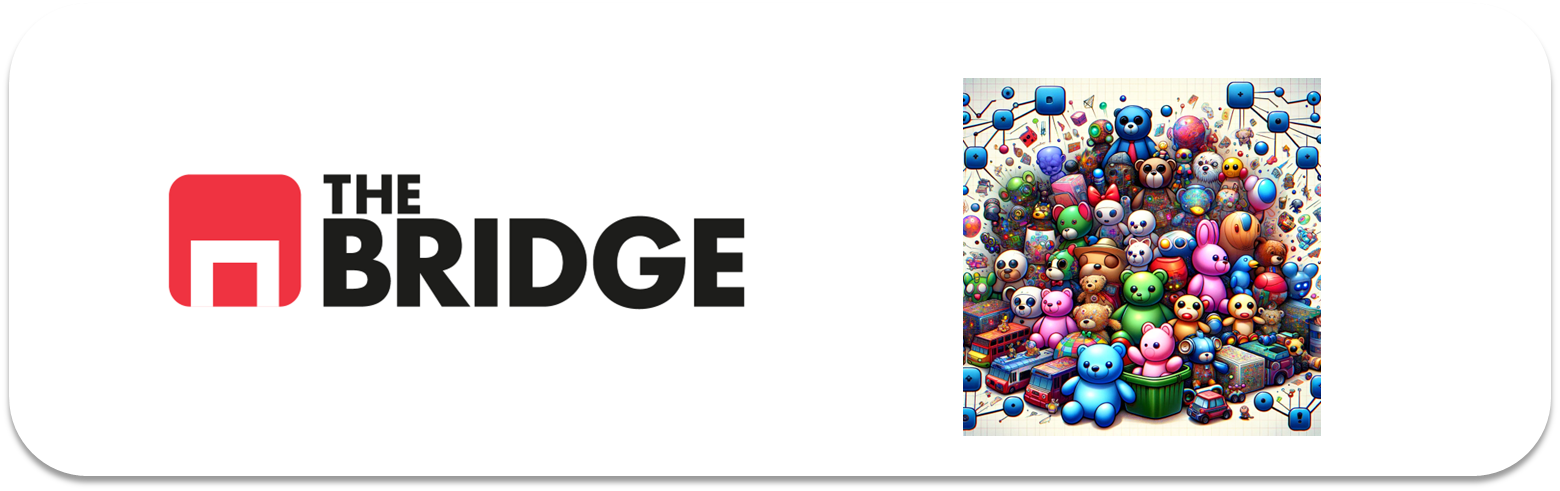

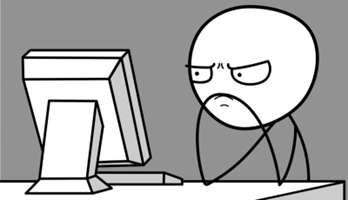

## PRACTICA OBLIGATORIA: DBSCAN y CLUSTERING JERARQUICO

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado aplicado a clustering jerárquico y no jerárquico. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bootcampviztools as bt
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN, AgglomerativeClustering
from itertools import combinations
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import KNeighborsClassifier


### Parte I. Modelado

#### Descripción del problema.

En una planta de experimentación con nuevas bebidas energéticas están trabajando con diferentes mezclas de componentes para obtener posibles variedades de su producto estrella "NonstopU". El problema es que la fabricación de cada "prototipo" conlleva demasiado tiempo y las pruebas de sabores y de propiedades "non-stop" antisueño y antifatiga son costosas.  

En ese sentido quieren construir algún sistema de segmentación previa de mezclas sin probarlas solo indicando las cantidades de cada componente de la bebida. Tienen datos pero desgraciadamente de mezclas anteriores con diferentes medidas pero que por temas presupuestarios y de prioridad no se hicieron test con usuarios y potenciales clientes, es decir no tienen un target de capacidad antifatiga o de preferncia del usuario que puedas servirles para construir un clasificador clásico como han hecho otras veces.  

Han acudido a vosotros con la necesidad de encontrar ese segmentador de posibles bebidas y con los datos de las mezclas no probadas anteriores por ver si vostros podéis ayudarles a encontrar algún tipo de segmentación que luego ello se encargarían de interpretar. No es requisito obligatorio pero les gustaría también poder establecer algún tipo de relación entre las segmentaciones (tipo cuales segmentos se "parecerían" más entre sí)

NOTA ORIENTATIVA: Los químicos no esperan que haya menos de 3 segmentos ni más de 5.  
NOTA OPERATIVA: El dataset con los datos que nos han dado los químicos está en "./data/empowering_drinks.csv"

**Se pide**: Construir al menos dos algoritmos de clustering (DBSCAN debe ser uno de ellos y el otro debería estar claro cual deberíamos usar dado el enunciado). Compararlos brevemente aunque sea meramente especulativo (¿Por qué es espculativo?)

**Se recomienda**: Visualizar las features dos a dos para escoger las mejores, no necesariamente hay que usar todas, ni tampoco quedarse en dos. Probar diferentes hiperparámetros en función de la nota orientativa y explicar porqué se han escogido los que finalmente se hayan escogido. 

Recuerda que el proceso es similar a lo que vimos en el otro tipo de aprendizaje:
1. Entender el problema
2. Cargar datos, visualizar.
3. MiniEDA: Selección de features
4. Tratamiento de Features.
5. Selección de modelos, selección de hiperparámetros
6. Entrenamiento, visualización de resultados.
7. Discusión de los mismos


### Visualización y entendimiento de los datos

In [2]:
empowering_drinks = pd.read_csv('data/empowering_drinks.csv', sep = '|')
empowering_drinks.head(5)

Azúcares  Vitamínas del grupo B   Cafeína  Ácido Cítrico   Taurina
0  1.518613               0.232053  1.034819       1.013009  0.251717
1  0.246290              -0.827996  0.733629       0.965242 -0.293321
2  0.196879               1.109334  1.215533       1.395148  0.269020
3  1.691550               0.487926  1.466525       2.334574  1.186068
4  0.295700               1.840403  0.663351      -0.037874 -0.319276

In [3]:
empowering_drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Azúcares               153 non-null    float64
 1   Vitamínas del grupo B  153 non-null    float64
 2   Cafeína                153 non-null    float64
 3   Ácido Cítrico          153 non-null    float64
 4   Taurina                153 non-null    float64
dtypes: float64(5)
memory usage: 6.1 KB


In [4]:
empowering_drinks.describe().T

count      mean       std       min       25%  \
Azúcares               153.0  0.019231  1.026182 -2.434235 -0.816038   
Vitamínas del grupo B  153.0  0.037273  0.995984 -3.679162 -0.499016   
Cafeína                153.0  0.041057  1.040928 -1.695971 -1.043392   
Ácido Cítrico          153.0  0.080022  1.009450 -1.493188 -0.738463   
Taurina                153.0 -0.044088  0.934399 -1.634288 -0.799428   

                            50%       75%       max  
Azúcares               0.061000  0.876275  2.259772  
Vitamínas del grupo B -0.023821  0.707247  3.156325  
Cafeína                0.211566  0.894264  3.062832  
Ácido Cítrico         -0.165254  0.917474  2.971473  
Taurina               -0.154899  0.493956  2.431870

No hay que escalar los datos porque la media ya está próxima a 0 y la std está próxima a 1.

Todas las features son de tipo numérica continua. Además parece que no hará falta transformar los datos ya que todas las features están en la misma escala a primera vista.

### Mini EDA

In [5]:
num_features = empowering_drinks.columns.to_list()

<Axes: >

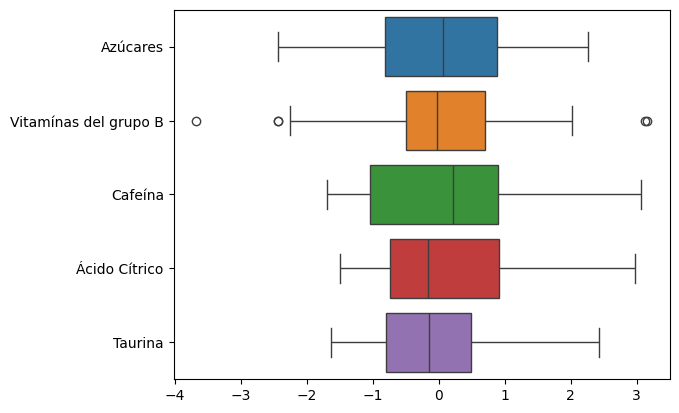

In [6]:
sns.boxplot(empowering_drinks[num_features], orient='h')

Tan solo hay outliers en la feature `Vitaminas del grupo B`

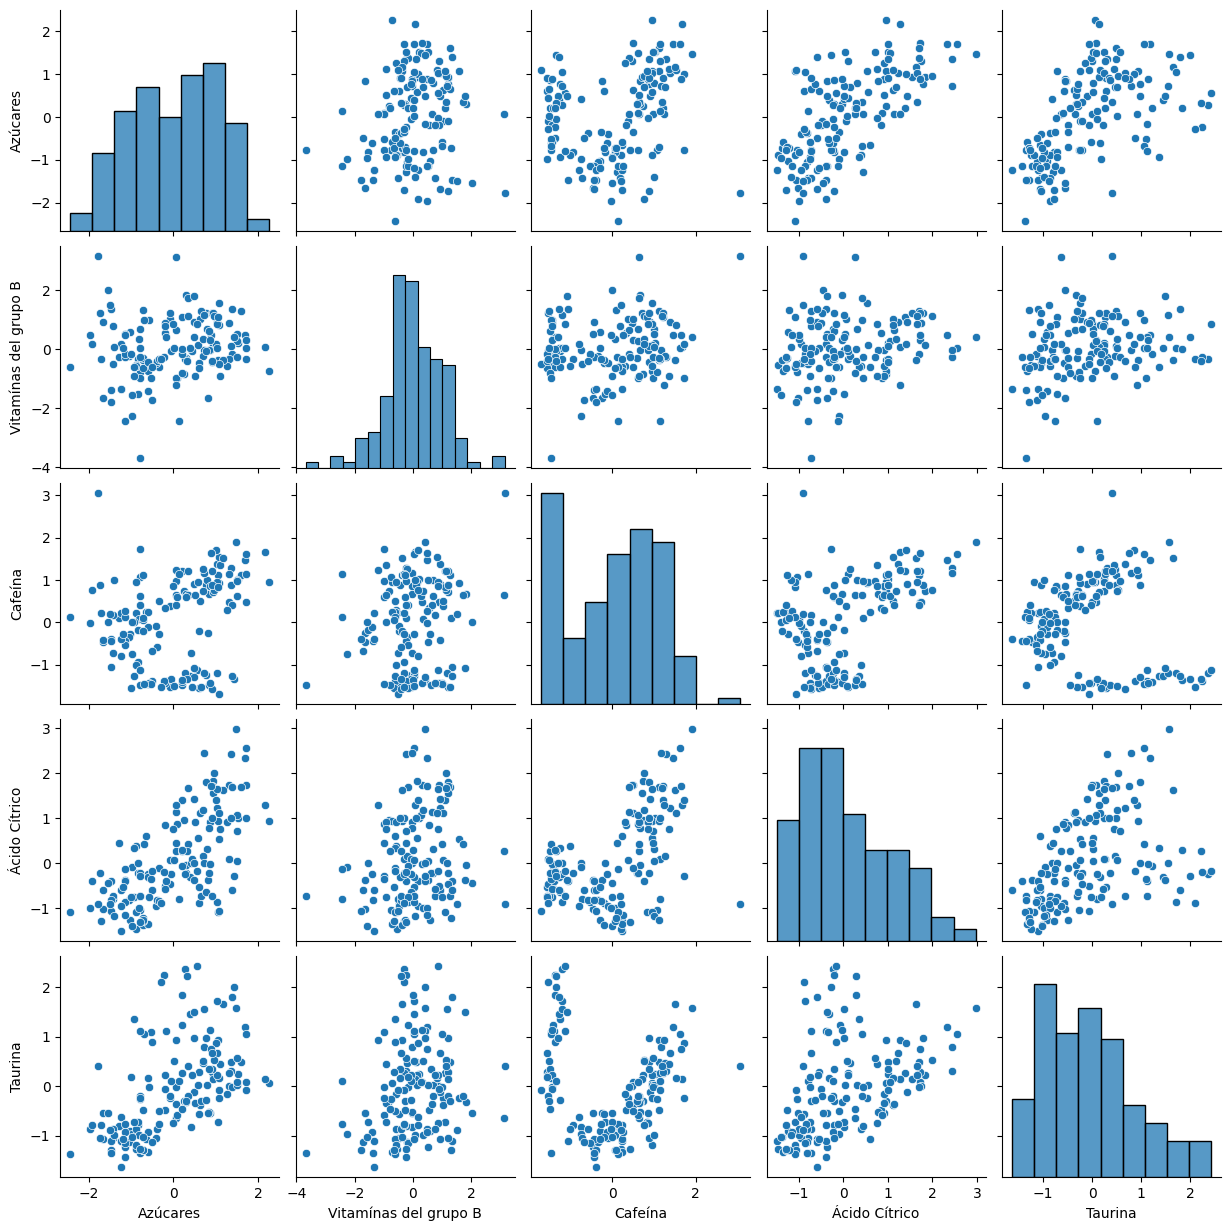

In [7]:
sns.pairplot(empowering_drinks);

A primera vista podemos observar que hay dos clusters definidos entre `Taurina` y `Cafeína`.

Azúcares vs Vitamínas del grupo B


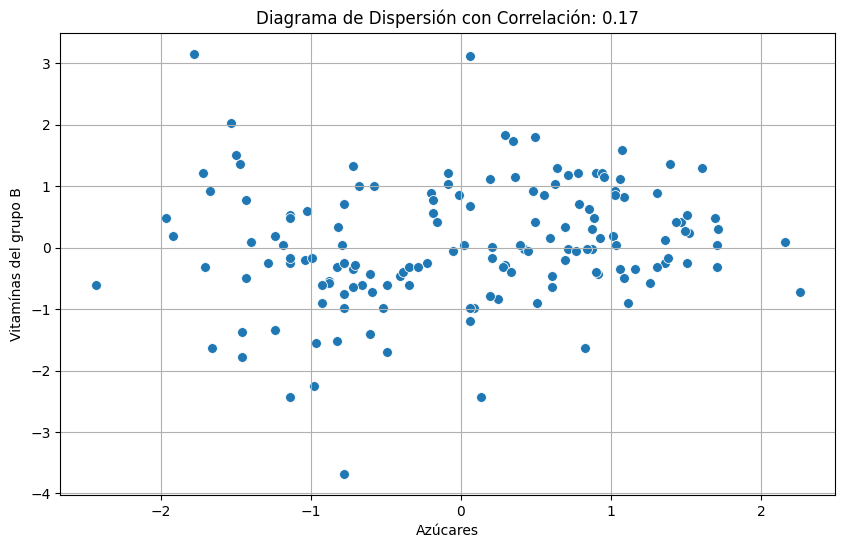

Azúcares vs Cafeína


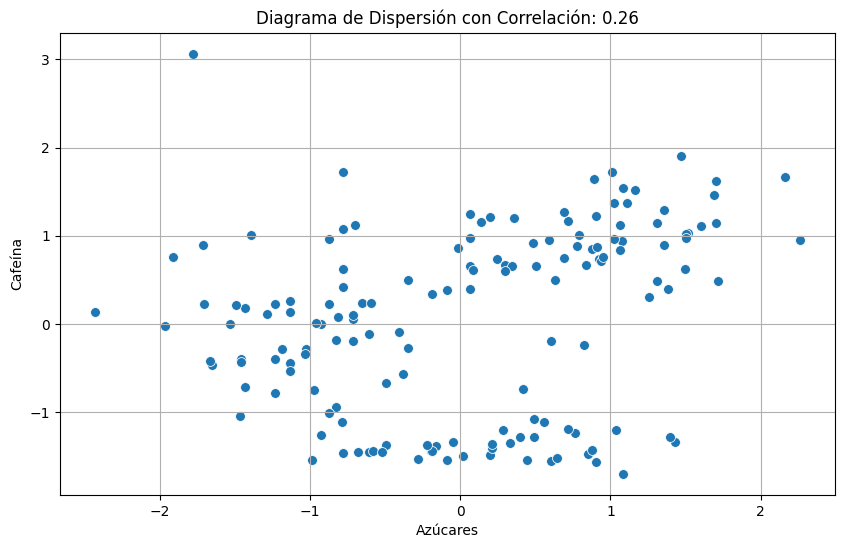

Azúcares vs Ácido Cítrico


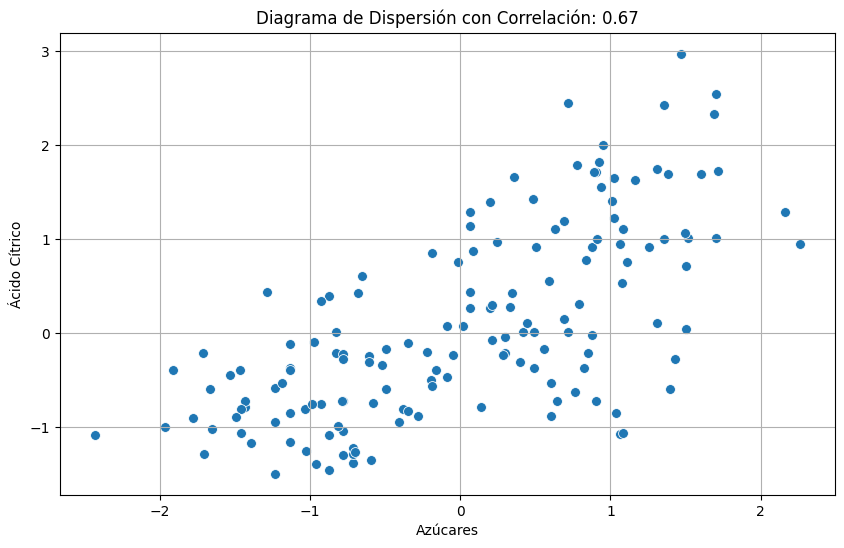

Azúcares vs Taurina


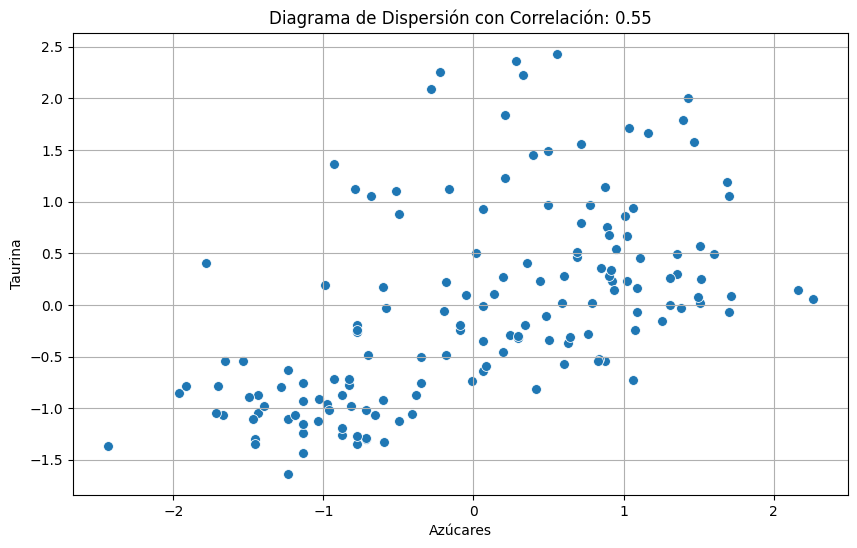

Vitamínas del grupo B vs Cafeína


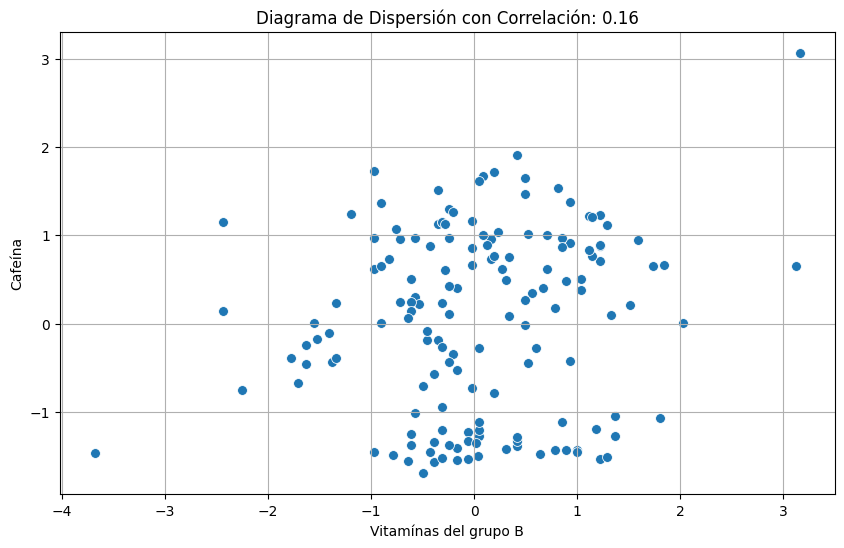

Vitamínas del grupo B vs Ácido Cítrico


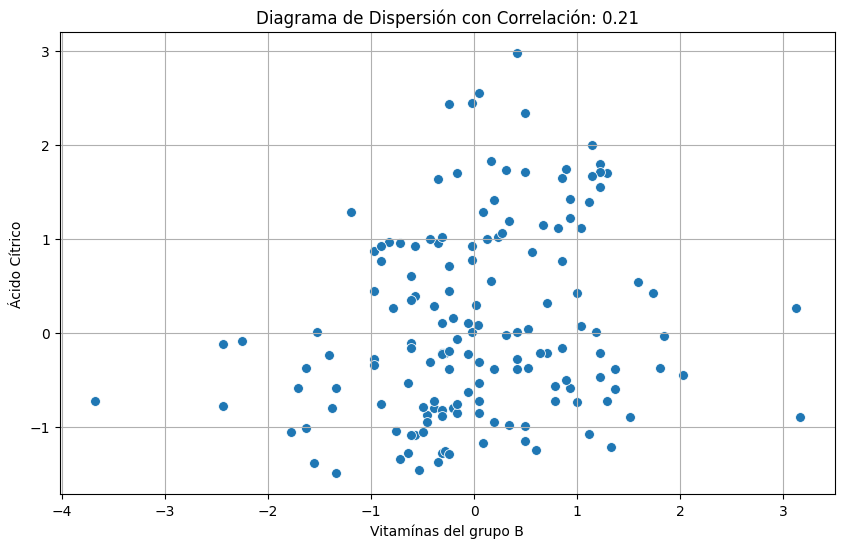

Vitamínas del grupo B vs Taurina


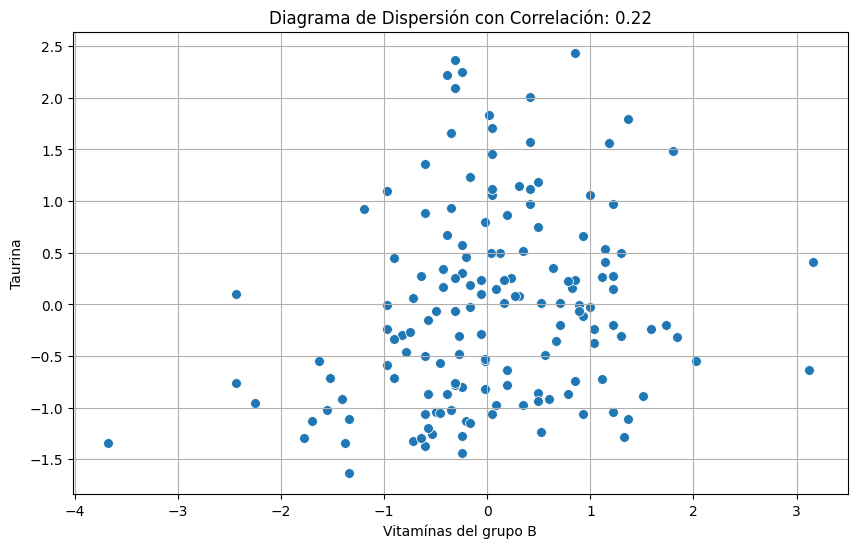

Cafeína vs Ácido Cítrico


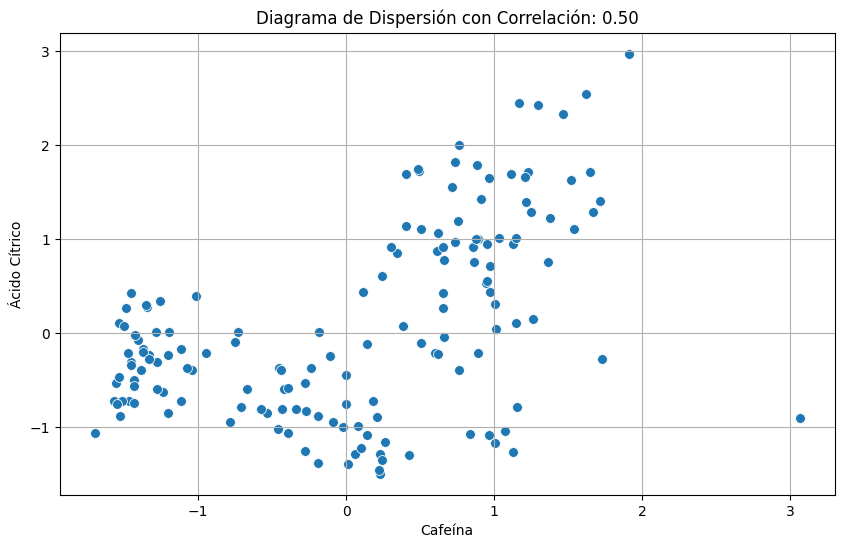

Cafeína vs Taurina


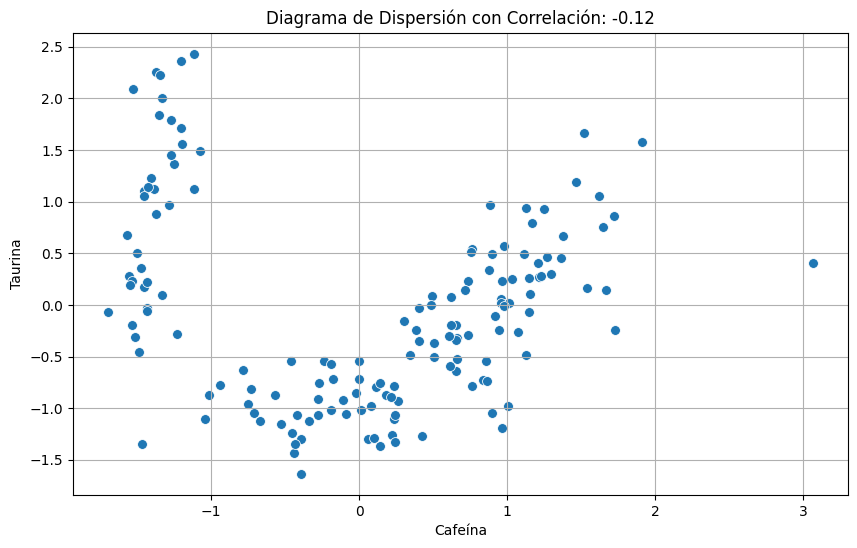

Ácido Cítrico vs Taurina


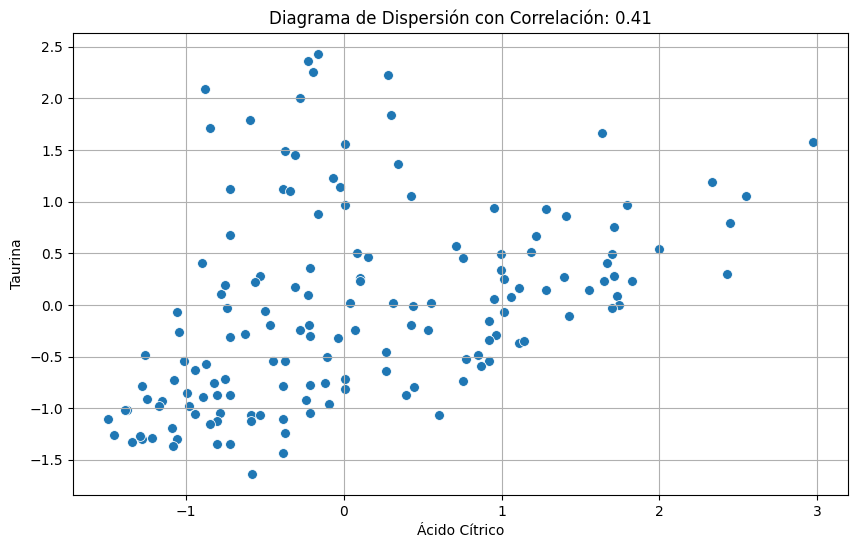

In [8]:
for x,y in combinations(empowering_drinks.columns, r = 2):
    print(f"{x} vs {y}")
    bt.grafico_dispersion_con_correlacion(empowering_drinks, x, y, mostrar_correlacion=True)

In [9]:
selected_features = ['Taurina','Cafeína']

### Tratamiento de features

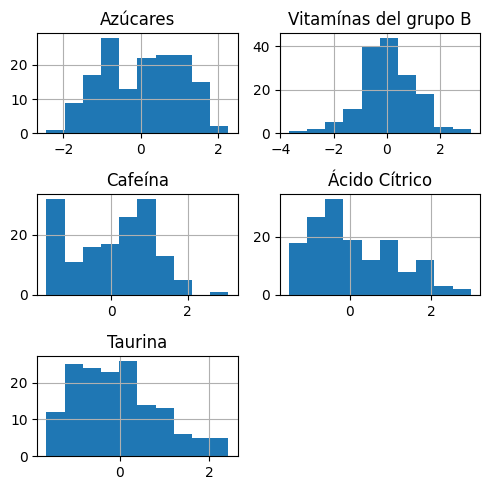

In [10]:
empowering_drinks.hist(figsize=(5,5))
plt.tight_layout()
plt.show()

Se podría transformar alguna features pero ya han sido transformadas y escaladas previamente por lo que mejor no tocarlas.

In [11]:
outlier_percent = []
experiments = {}

for min_samples in [3,5,10]:
    print(f"Min_samples = {min_samples}")
    outlier_percent = []

    for eps in np.linspace(0.001,6,100): # Genera 50 valores equidistantes entre 0.001 y 3
    
        dbscan = DBSCAN(eps = eps, min_samples = min_samples)
        dbscan.fit(empowering_drinks)
        #Registro del porcentaje anomalías. Se etiquetan como (-1)
        perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
        outlier_percent.append(perc_outliers)
    experiments[min_samples] = outlier_percent.copy()

Min_samples = 3
Min_samples = 5
Min_samples = 10


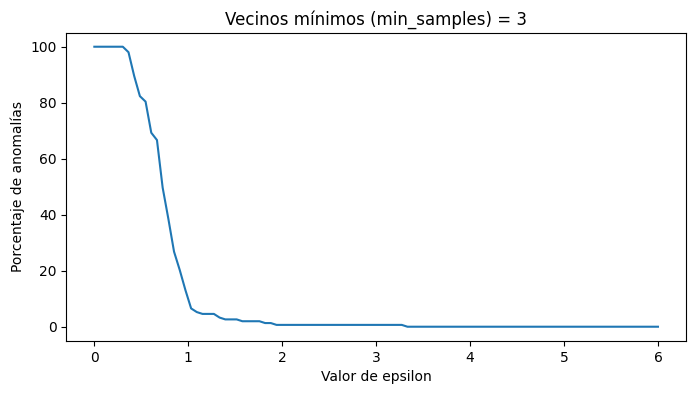

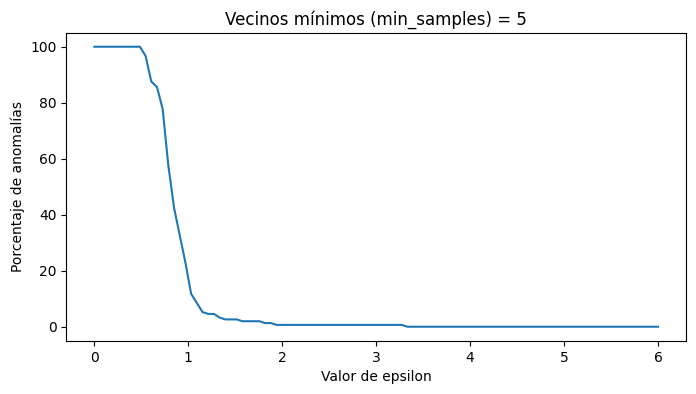

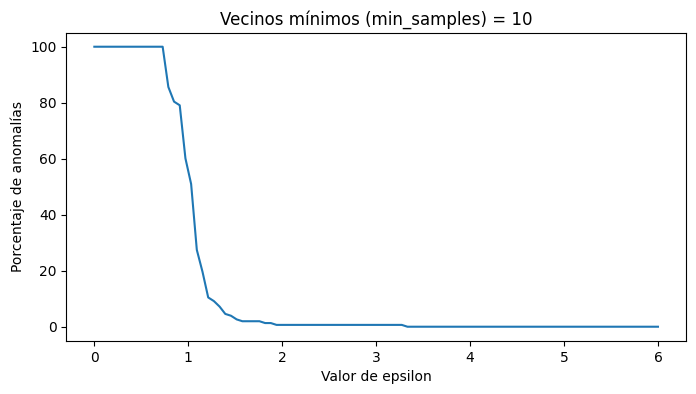

In [12]:
for min_samples in [3,5,10]:
    plt.figure(figsize=(8,4), dpi = 100)
    sns.lineplot(x = np.linspace(0.001,6,100), y = experiments[min_samples])
    plt.ylabel('Porcentaje de anomalías')
    plt.xlabel('Valor de epsilon')
    plt.title(f"Vecinos mínimos (min_samples) = {min_samples}")
    plt.show()

In [13]:
for min_samples in [3,5,10]:
    print(f"Para num_samples = {min_samples}:")
    for indice, valor in enumerate(np.linspace(0.001,6,100)):
        if 1.2 <= valor <= 2:
            print(f"{valor} -> {experiments[min_samples][indice]}")

Para num_samples = 3:
1.2129191919191917 -> 4.57516339869281
1.2735151515151513 -> 4.57516339869281
1.334111111111111 -> 3.2679738562091503
1.3947070707070706 -> 2.6143790849673203
1.45530303030303 -> 2.6143790849673203
1.5158989898989896 -> 2.6143790849673203
1.5764949494949492 -> 1.9607843137254901
1.637090909090909 -> 1.9607843137254901
1.6976868686868685 -> 1.9607843137254901
1.758282828282828 -> 1.9607843137254901
1.8188787878787878 -> 1.3071895424836601
1.8794747474747473 -> 1.3071895424836601
1.9400707070707068 -> 0.6535947712418301
Para num_samples = 5:
1.2129191919191917 -> 4.57516339869281
1.2735151515151513 -> 4.57516339869281
1.334111111111111 -> 3.2679738562091503
1.3947070707070706 -> 2.6143790849673203
1.45530303030303 -> 2.6143790849673203
1.5158989898989896 -> 2.6143790849673203
1.5764949494949492 -> 1.9607843137254901
1.637090909090909 -> 1.9607843137254901
1.6976868686868685 -> 1.9607843137254901
1.758282828282828 -> 1.9607843137254901
1.8188787878787878 -> 1.3071895

In [14]:
for min_samples in [3,5,10]:
    dbscan = DBSCAN(eps = 1.2, min_samples = min_samples)
    dbscan.fit(empowering_drinks)
    print(f"Para {min_samples} de vecinos: {pd.Series(dbscan.labels_).nunique() -1} clusters")

Para 3 de vecinos: 1 clusters
Para 5 de vecinos: 1 clusters
Para 10 de vecinos: 3 clusters


In [15]:
empowering_drinks['Labels'] = dbscan.labels_

In [16]:
empowering_drinks['Labels'].value_counts()

Labels
 0    51
 1    49
 2    31
-1    22
Name: count, dtype: int64

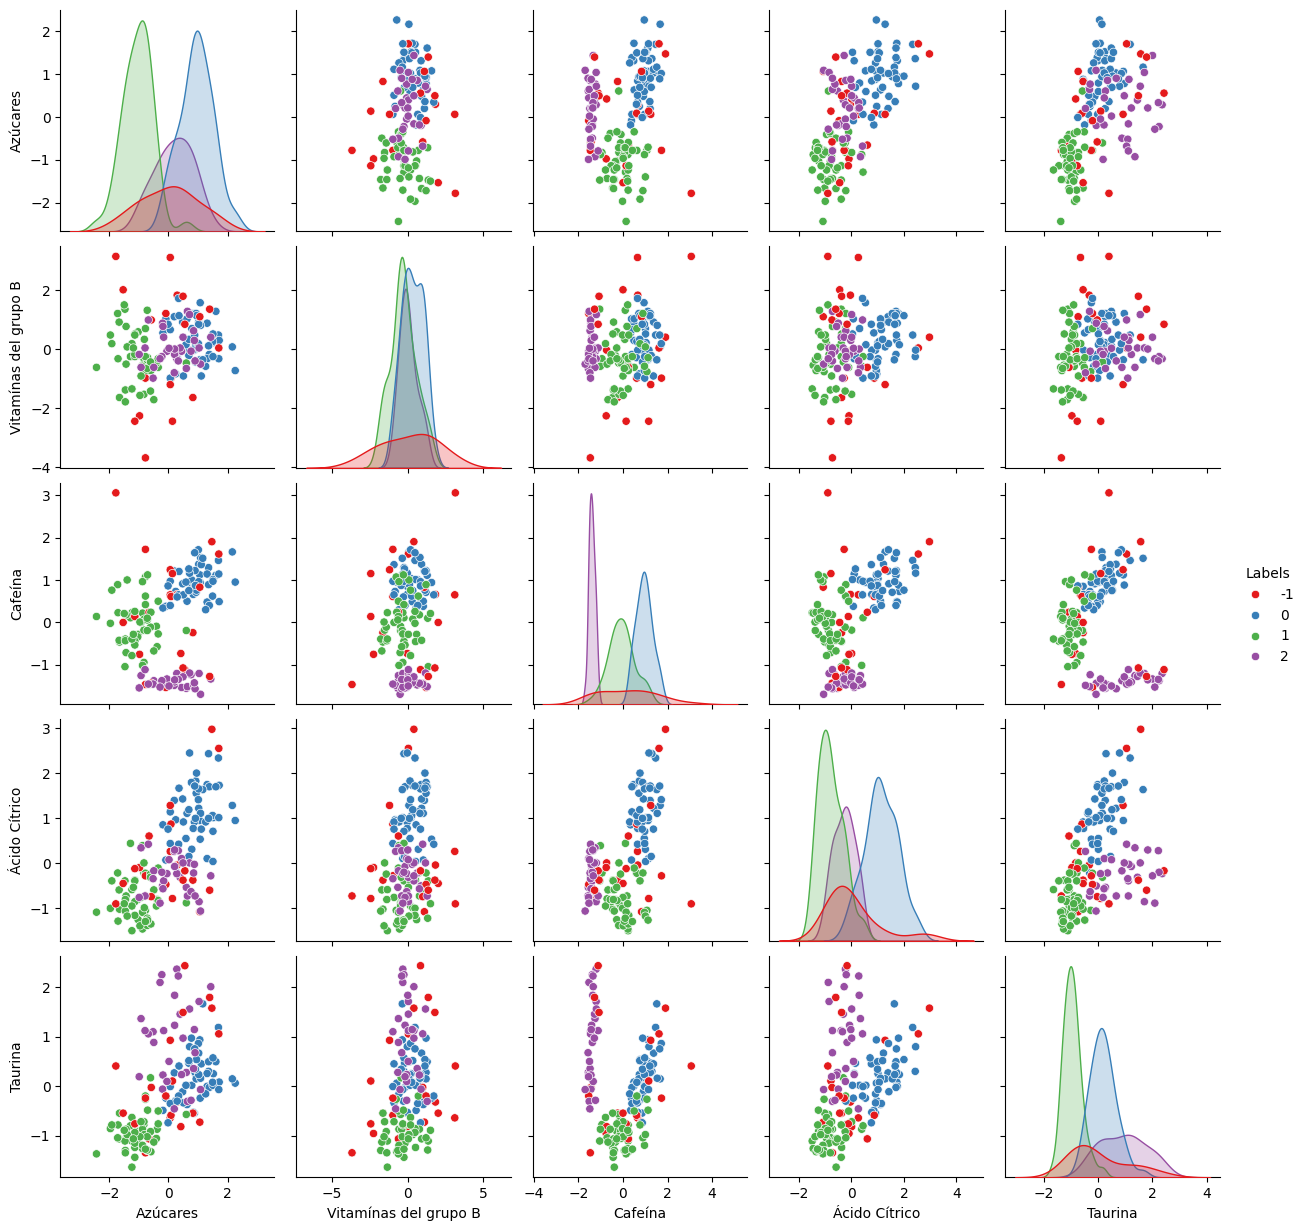

In [17]:
sns.pairplot(data = empowering_drinks, hue = 'Labels', palette='Set1');

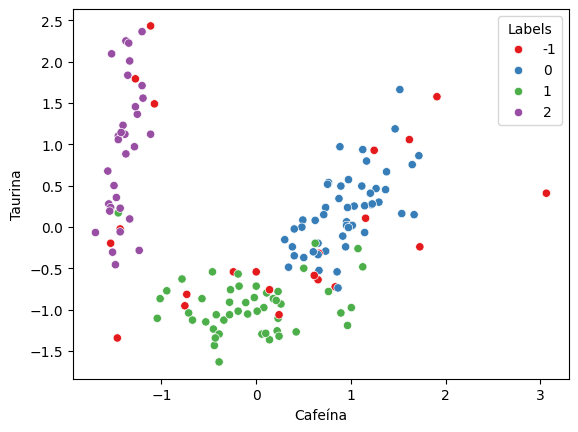

In [18]:
sns.scatterplot(data = empowering_drinks[['Cafeína','Taurina','Labels']], x = empowering_drinks['Cafeína'], y = empowering_drinks['Taurina'], hue = 'Labels', palette='Set1');

Obtenemos valores en -1 porque está teniendo en cuenta todas las features cuando nosotros vemos claramente que deberían pertenecer a un cluster en concreto.

Ahora vamos a probar la clusterización pero solo con unas features concretas: `Cafeína` y `Taurina`.

In [19]:
outlier_percent = []
experiments = {}

for min_samples in [3,5,10]:
    print(f"Min_samples = {min_samples}")
    outlier_percent = []

    for eps in np.linspace(0.001,6,100): # Genera 50 valores equidistantes entre 0.001 y 3
    
        dbscan = DBSCAN(eps = eps, min_samples = min_samples)
        dbscan.fit(empowering_drinks[selected_features])
        #Registro del porcentaje anomalías. Se etiquetan como (-1)
        perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
        outlier_percent.append(perc_outliers)
    experiments[min_samples] = outlier_percent.copy()

Min_samples = 3
Min_samples = 5
Min_samples = 10


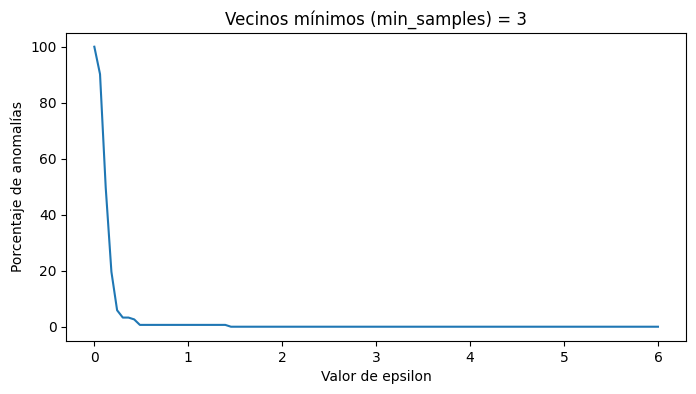

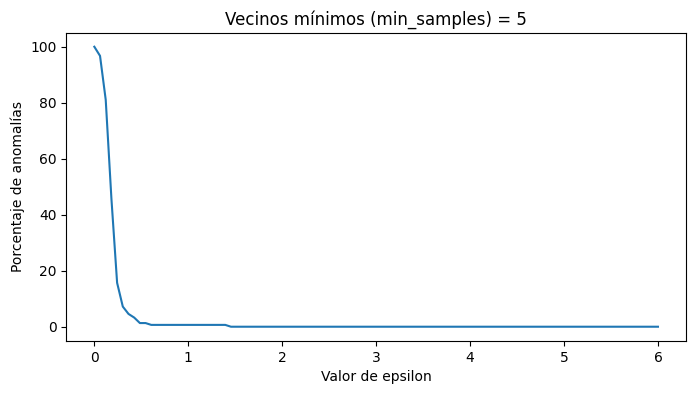

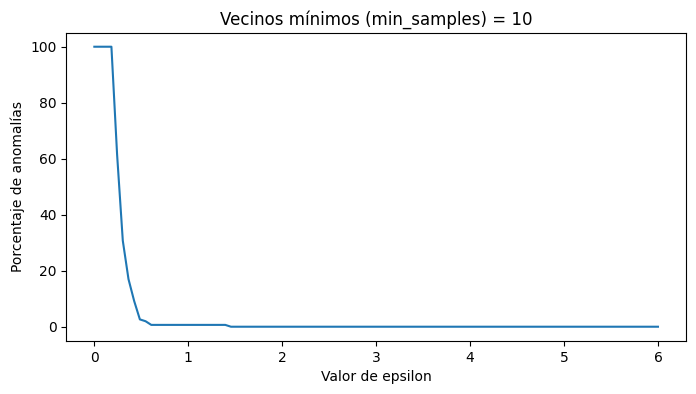

In [20]:
for min_samples in [3,5,10]:
    plt.figure(figsize=(8,4), dpi = 100)
    sns.lineplot(x = np.linspace(0.001,6,100), y = experiments[min_samples])
    plt.ylabel('Porcentaje de anomalías')
    plt.xlabel('Valor de epsilon')
    plt.title(f"Vecinos mínimos (min_samples) = {min_samples}")
    plt.show()

In [21]:
for min_samples in [3,5,10]:
    print(f"Para num_samples = {min_samples}:")
    for indice, valor in enumerate(np.linspace(0.001,6,100)):
        if 0 <= valor <= 2:
            print(f"{valor} -> {experiments[min_samples][indice]}")

Para num_samples = 3:
0.001 -> 100.0
0.06159595959595959 -> 90.19607843137256
0.12219191919191918 -> 49.673202614379086
0.18278787878787878 -> 19.607843137254903
0.24338383838383837 -> 5.882352941176471
0.30397979797979796 -> 3.2679738562091503
0.36457575757575755 -> 3.2679738562091503
0.42517171717171715 -> 2.6143790849673203
0.48576767676767674 -> 0.6535947712418301
0.5463636363636363 -> 0.6535947712418301
0.6069595959595959 -> 0.6535947712418301
0.6675555555555556 -> 0.6535947712418301
0.7281515151515151 -> 0.6535947712418301
0.7887474747474746 -> 0.6535947712418301
0.8493434343434343 -> 0.6535947712418301
0.9099393939393939 -> 0.6535947712418301
0.9705353535353535 -> 0.6535947712418301
1.031131313131313 -> 0.6535947712418301
1.0917272727272724 -> 0.6535947712418301
1.1523232323232322 -> 0.6535947712418301
1.2129191919191917 -> 0.6535947712418301
1.2735151515151513 -> 0.6535947712418301
1.334111111111111 -> 0.6535947712418301
1.3947070707070706 -> 0.6535947712418301
1.45530303030303

In [22]:
for min_samples in [3,5,10]:
    dbscan = DBSCAN(eps = 0.303, min_samples = min_samples)
    dbscan.fit(empowering_drinks[selected_features])
    print(f"Para {min_samples} de vecinos: {pd.Series(dbscan.labels_).nunique() -1} clusters")

Para 3 de vecinos: 3 clusters
Para 5 de vecinos: 4 clusters
Para 10 de vecinos: 3 clusters


In [23]:
empowering_drinks_2f = empowering_drinks.copy()
empowering_drinks_2f['Labels'] = dbscan.labels_

In [27]:
empowering_drinks_2f.Labels.value_counts()

Labels
 0    51
-1    48
 1    40
 2    14
Name: count, dtype: int64

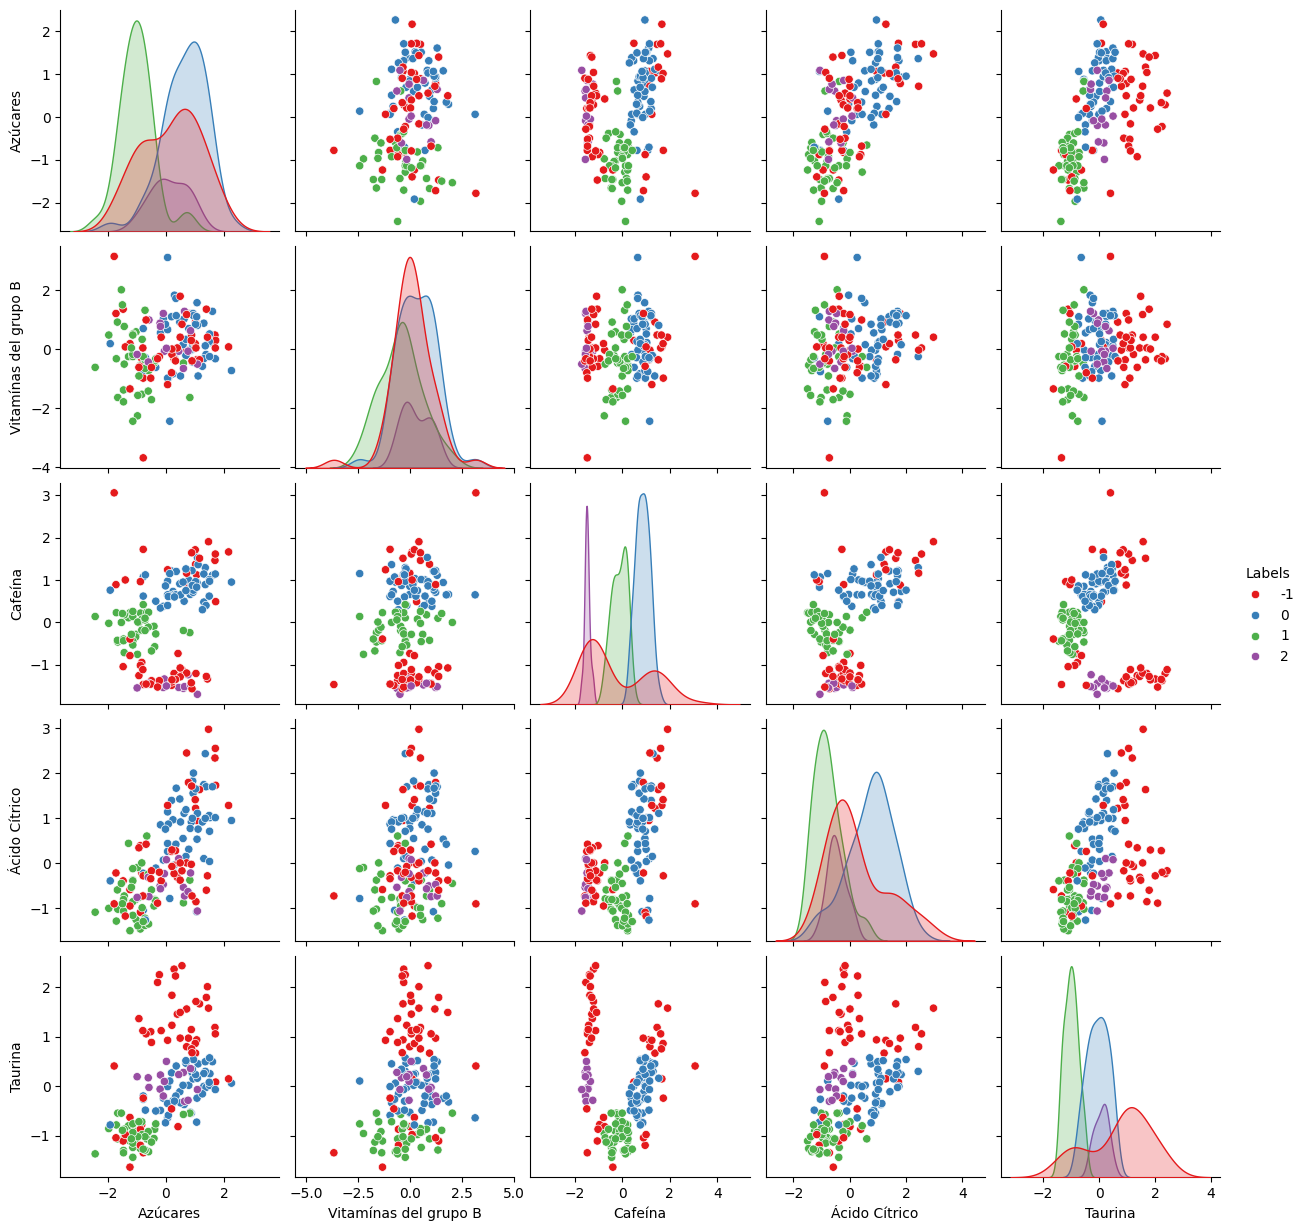

In [26]:
sns.pairplot(data = empowering_drinks_2f, hue = 'Labels', palette='Set1');

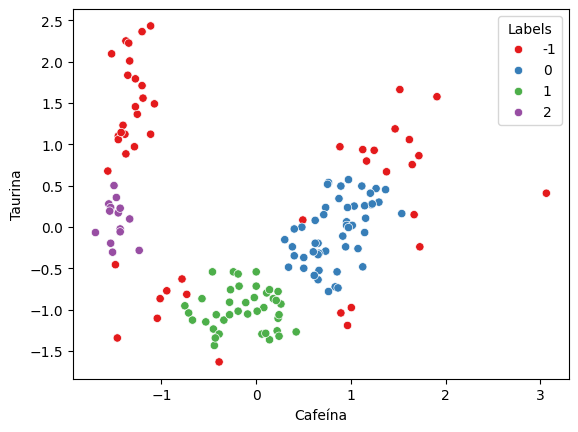

In [30]:
sns.scatterplot(data = empowering_drinks_2f, x = empowering_drinks_2f['Cafeína'], y = empowering_drinks_2f['Taurina'], hue = 'Labels', palette='Set1');

El modelo encuentra demasiadas anomalías con número de vecinos = 10.

In [48]:
dbscan_3 = DBSCAN(eps = 0.3, min_samples = 3)
dbscan_3.fit(empowering_drinks_2f[selected_features])
empowering_drinks_2f['Labels'] = dbscan_3.labels_

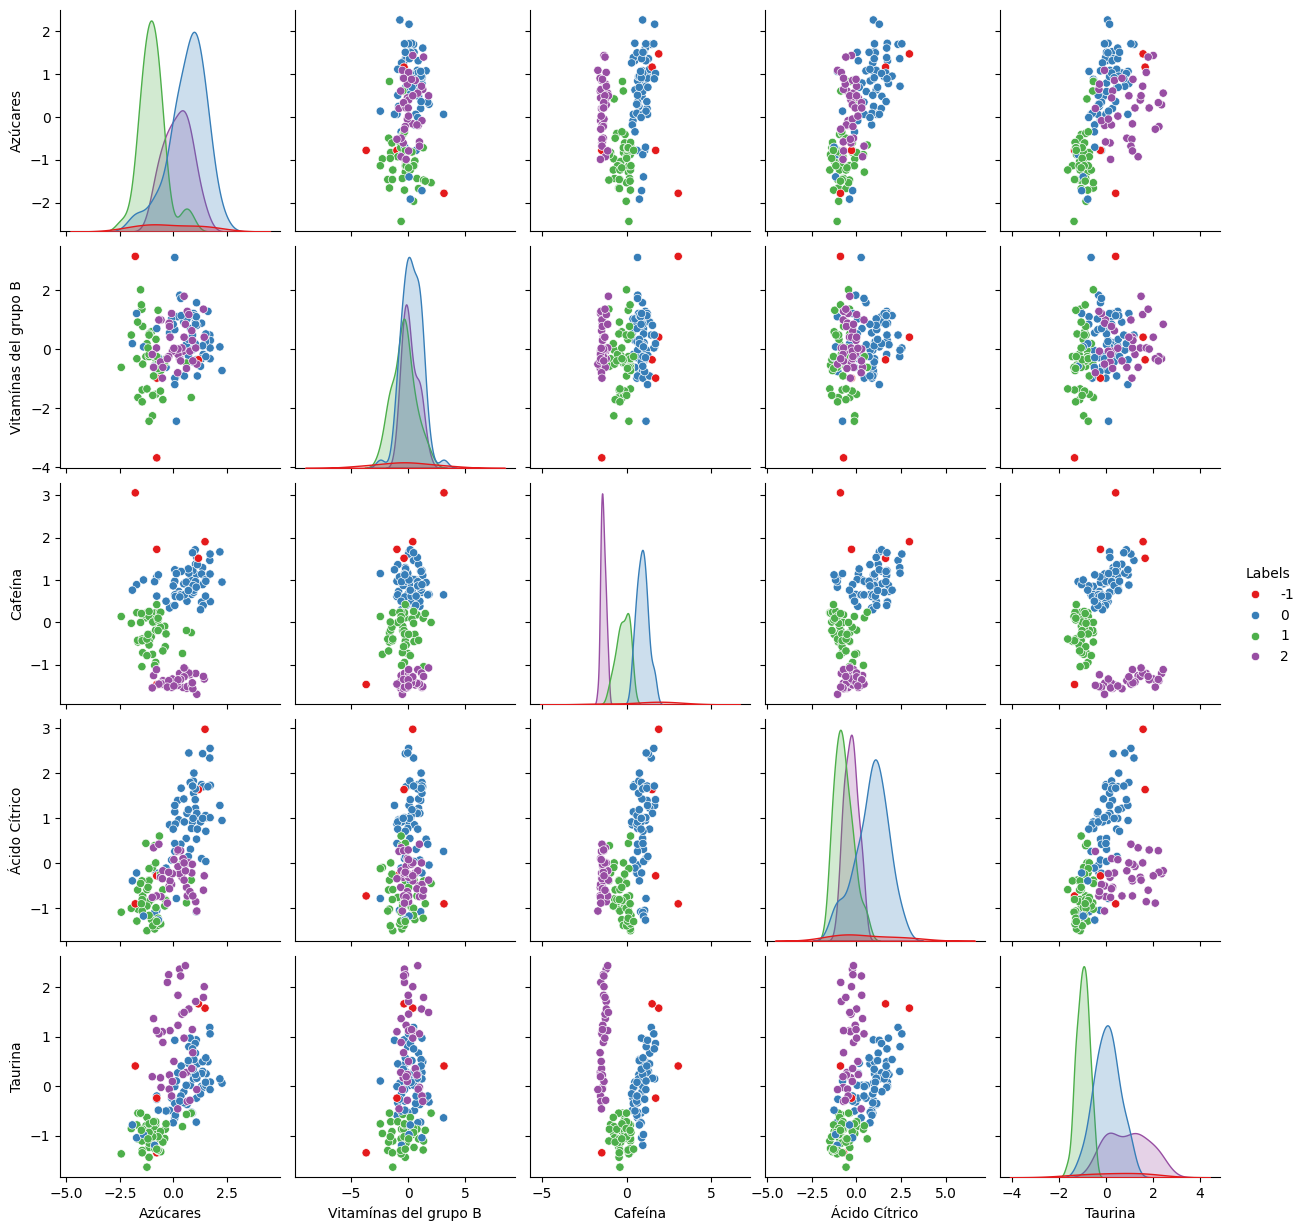

In [49]:
sns.pairplot(data = empowering_drinks_2f, hue = 'Labels', palette='Set1');

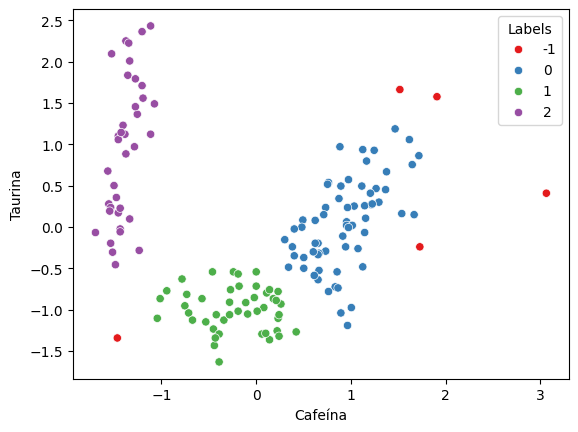

In [50]:
sns.scatterplot(data = empowering_drinks_2f, x = empowering_drinks_2f['Cafeína'], y = empowering_drinks_2f['Taurina'], hue = 'Labels', palette='Set1');


Como **conclusión** podemos decir que lo mejor sería usar un total de vecinos =3, y solo coger las variables que habíamos visto en un principio que tenían una posible clusterización `Cafeína` y `Taurina`. eps = 0.3 y min_samples = 3 para nuestro modelo DBSCAN.

### Modelo Aglomerativo Jerárquico

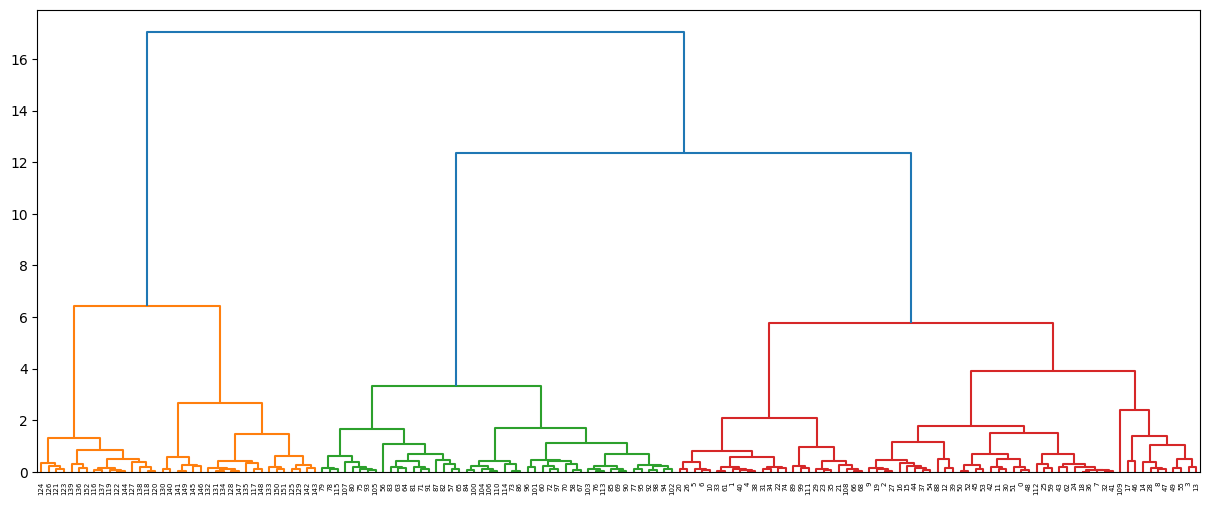

In [65]:
link_method = linkage(empowering_drinks[selected_features], method = 'ward')
plt.figure(figsize=(15,6))
dend = dendrogram(link_method)

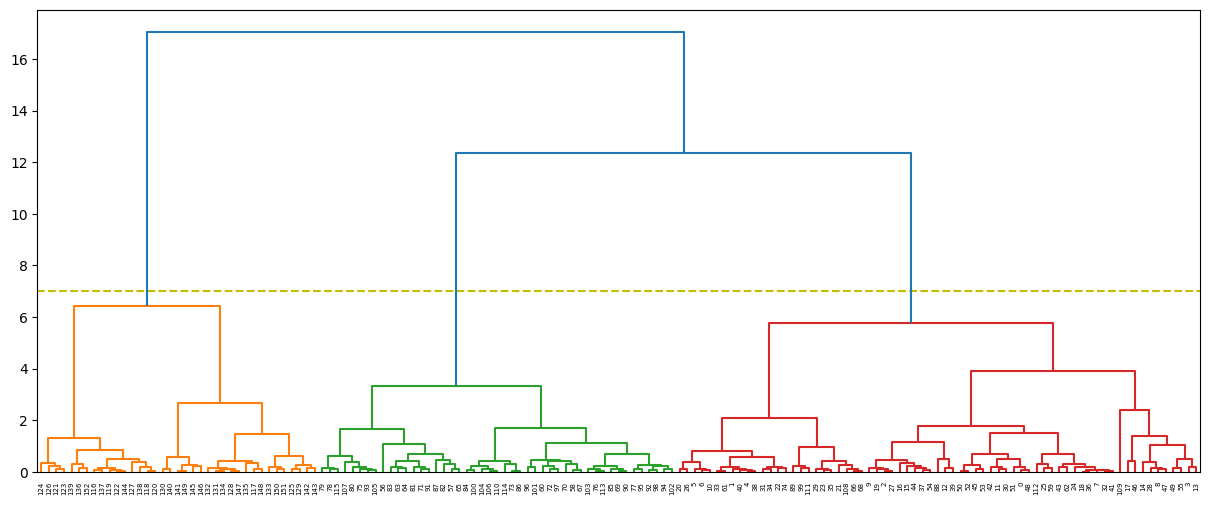

In [73]:
link_method = linkage(empowering_drinks[selected_features], method = 'ward')
plt.figure(figsize=(15,6))
plt.axhline(y = 7, color = 'y', linestyle = '--')
dend = dendrogram(link_method)

In [ ]:
clustering_model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
clustering_model.fit(empowering_drinks[selected_features])
empowering_drinks_agg = empowering_drinks.copy()
empowering_drinks_agg['Cluster'] = clustering_model.labels_

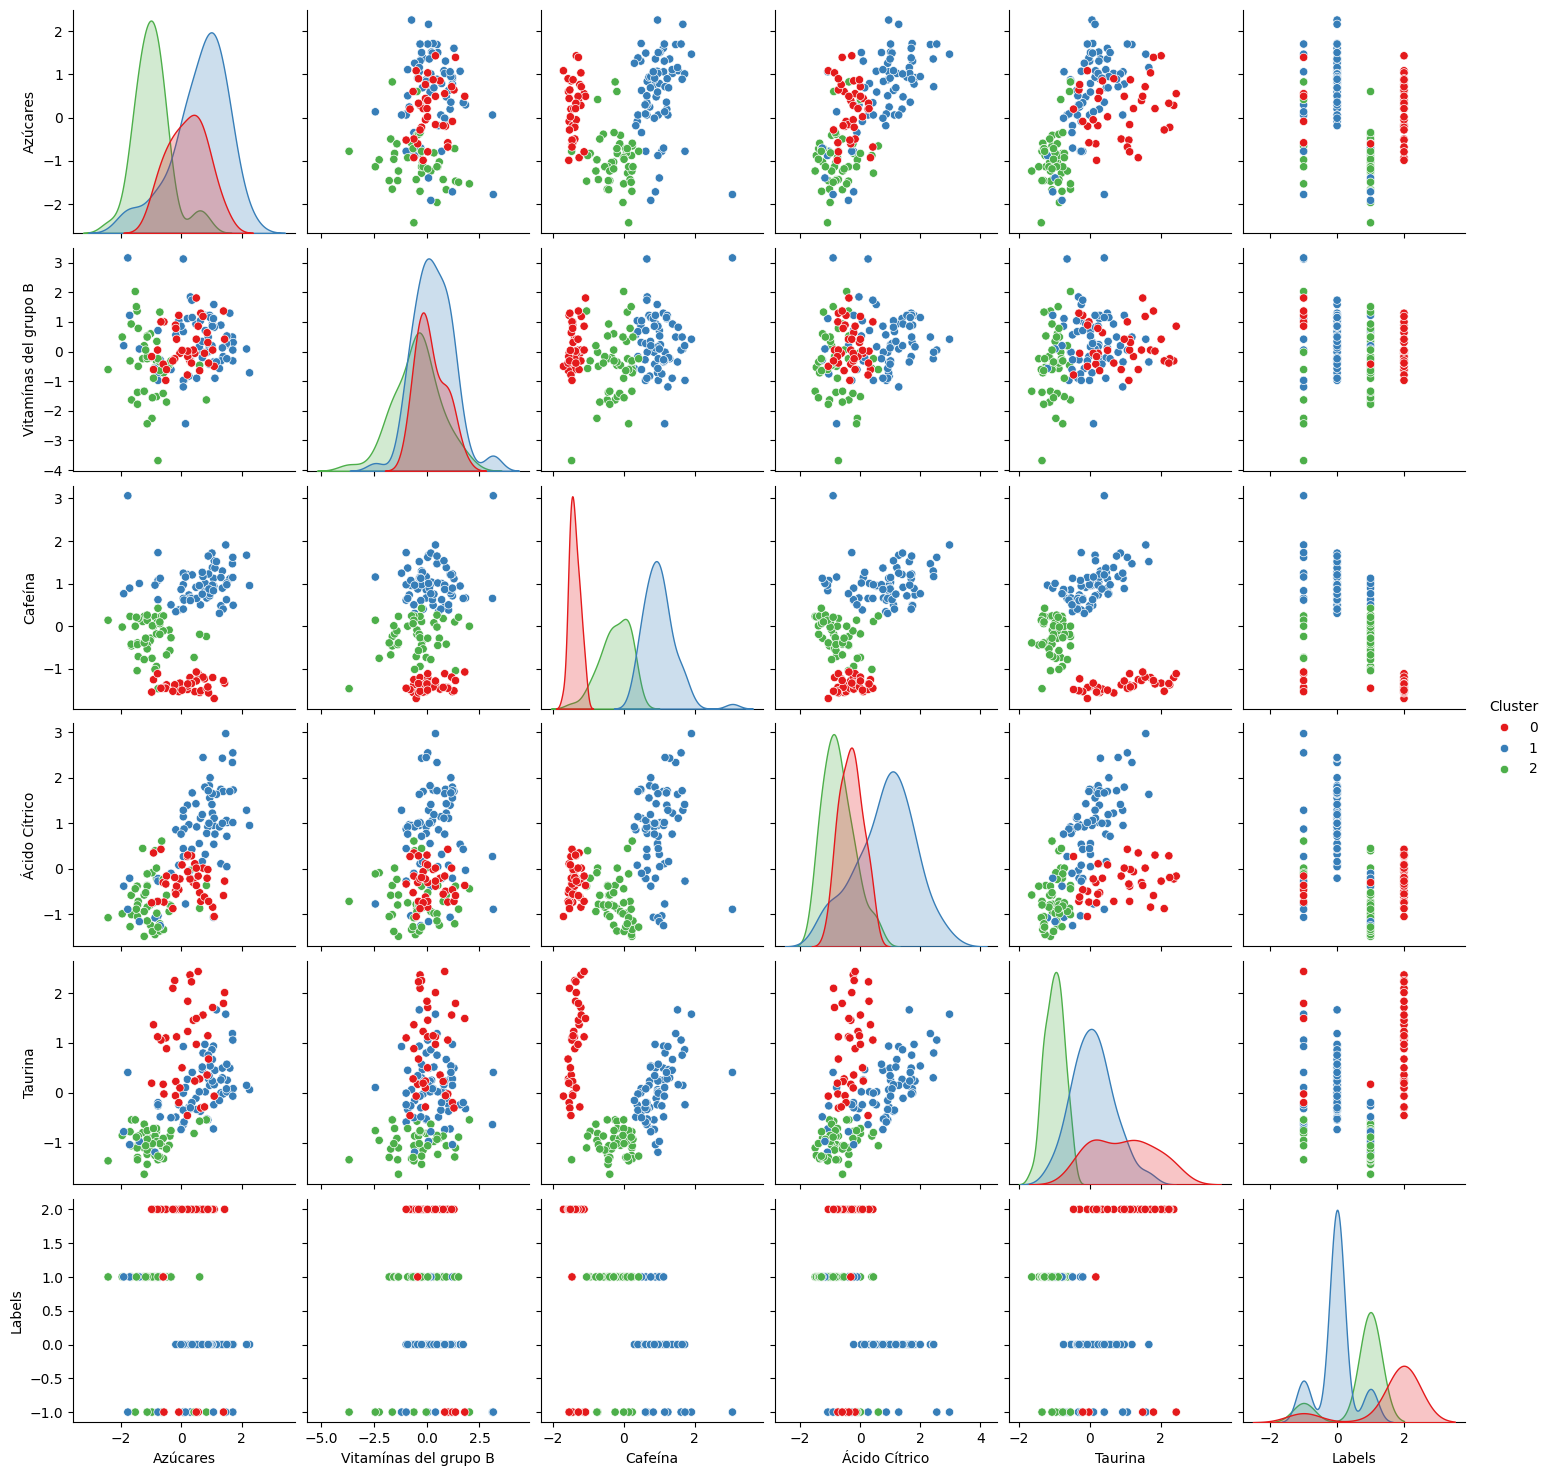

In [75]:
sns.pairplot(empowering_drinks_agg, hue = 'Cluster', palette='Set1');

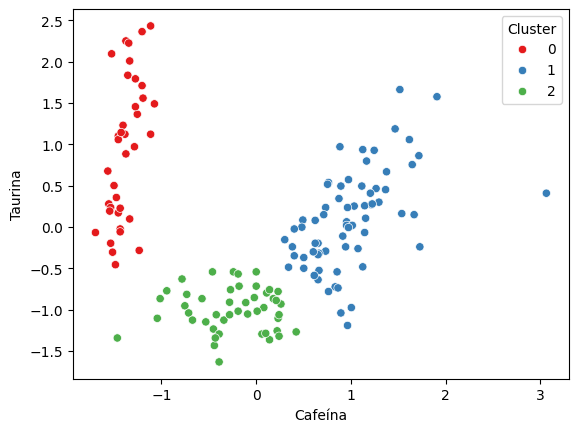

In [77]:
sns.scatterplot(empowering_drinks_agg, x = empowering_drinks_agg['Cafeína'], y = empowering_drinks_agg['Taurina'], hue = 'Cluster', palette='Set1');

Este modelo clusteriza prácticamente igual que el DBSCAN a diferencia de que no hay anomalías ya que este tipo de cluster no las detecta y las ha asignado a algunos de los 3 clusters.

Cómo saber que cluster es cada color.

In [81]:
print(empowering_drinks_agg.loc[124]['Cluster'])
print(empowering_drinks_agg.loc[93]['Cluster'])
print(empowering_drinks_agg.loc[1]['Cluster'])

0.0
2.0
1.0


- El cluster de color ``naranja`` es el 0.
- El cluster de color ``verde`` es el 2.
- El cluster de color ``rojo`` es el 1.

### Parte II. Nuevos experimentos

Los químicos están muy esperanzados con los modelos que les habéis mostrado y os pasan una lista de nuevos experimentos para que los clasifiquéis. Emplea uno de los modelos construidos, el que te resulte más sencillo, para segmentar los nuevos experimentos que puedes encontrar en "./data/new_experiments.csv"

In [38]:
new_experiments = pd.read_csv('data/new_experiments.csv', sep = '|')
new_experiments.head()

Azúcares  Vitamínas del grupo B   Cafeína  Ácido Cítrico   Taurina
0  1.481555               0.305159  1.366128       2.239039  0.731870
1  0.616869               0.890014  0.583034       0.312420 -0.665332
2 -1.680724               0.341713 -0.340615      -0.213021 -0.976782
3 -0.284874              -1.412851 -0.782361      -1.193845 -0.717240
4 -0.927212               0.634140 -1.565455      -0.085641 -0.522583

In [53]:
x_train = empowering_drinks_2f[selected_features]
y_train = empowering_drinks_2f['Labels']

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
new_experiments_copy = new_experiments.copy()

In [82]:
new_labels = knn.predict(new_experiments_copy[selected_features])
new_experiments_copy['Labels'] = new_labels
new_experiments_copy

Azúcares  Vitamínas del grupo B   Cafeína  Ácido Cítrico   Taurina  Labels
0  1.481555               0.305159  1.366128       2.239039  0.731870       0
1  0.616869               0.890014  0.583034       0.312420 -0.665332       0
2 -1.680724               0.341713 -0.340615      -0.213021 -0.976782       1
3 -0.284874              -1.412851 -0.782361      -1.193845 -0.717240       1
4 -0.927212               0.634140 -1.565455      -0.085641 -0.522583       2
5  0.962743              -0.243142 -1.354622      -0.420013  1.956043       2

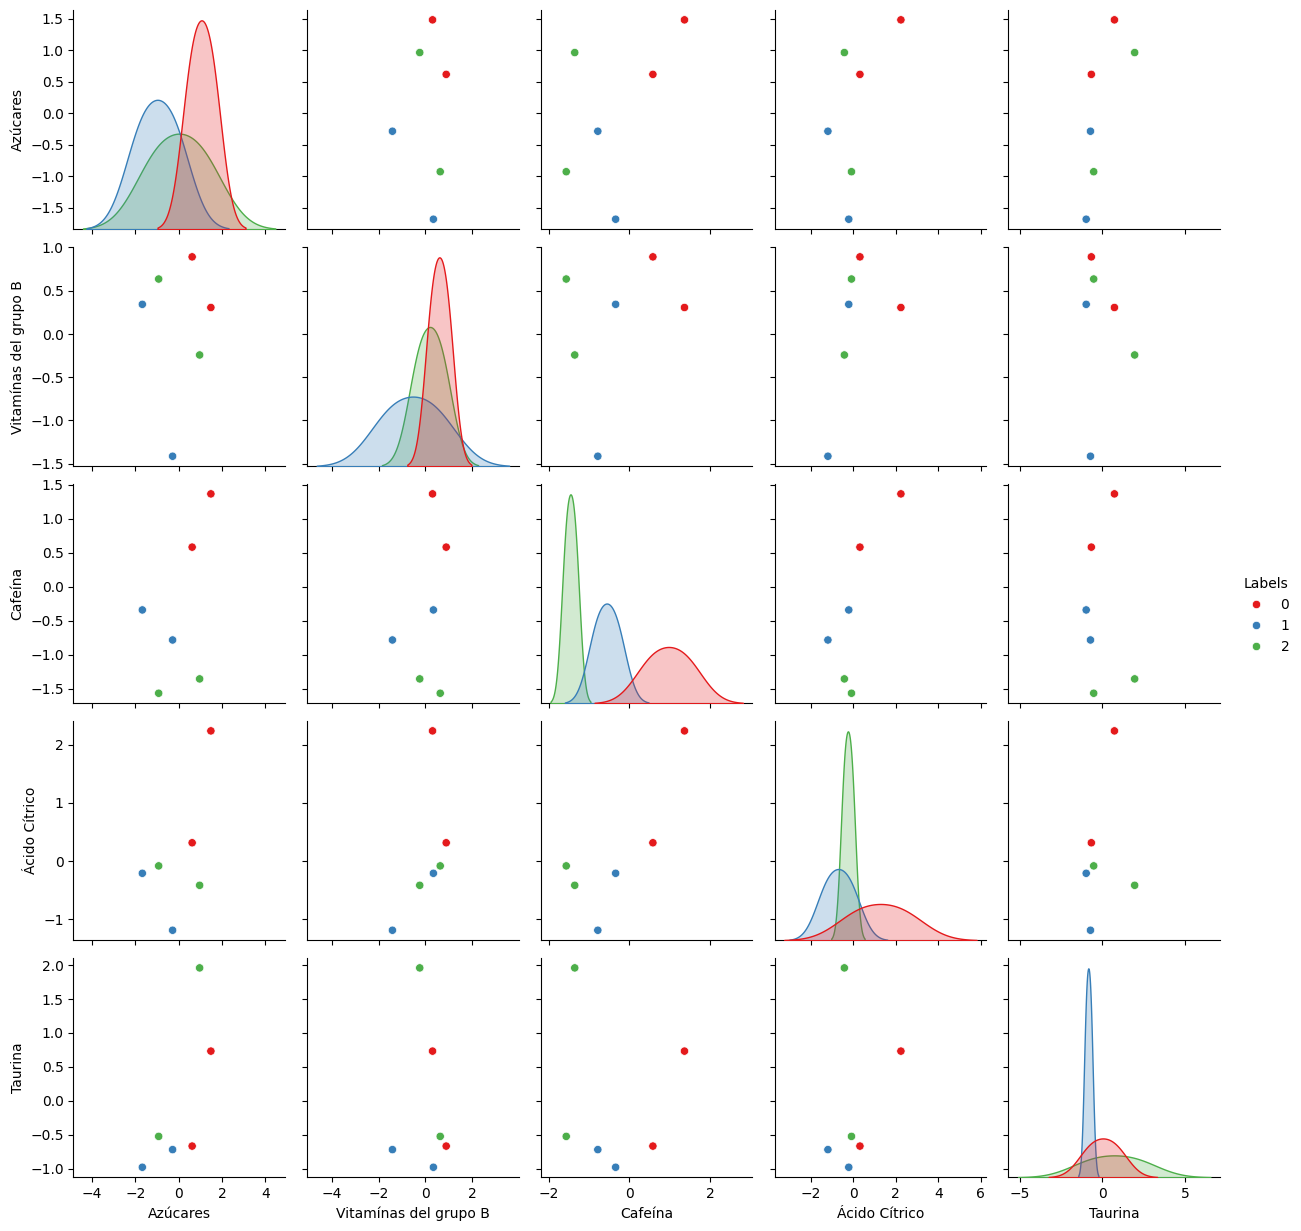

In [63]:
sns.pairplot(new_experiments_copy, hue = 'Labels', palette='Set1' );

### Parte III. EXTRA (Voluntario): 6 meses después...

La unidad de experimentación recibió un presupuesto adicional gracias a los modelos que les proporcionastes e hizo pruebas con cliente y obtuvo resultados como para clasificar cada bebida en terminos de "energización" en tres niveles (1, media; 2, media-alta, 3, alta). El resultado de los mismos está en el fichero adecuado en el directorio data y alineado con los experimentos iniciales y al final con los nuevos experimentos de la parte anterior.

Evalua la segmentación de los modelos creados en la primera parte.